In [ ]:
#Importieren von Bibliotheken
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Daten laden
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Datenbereinigung
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter für deutsche Data Analyst Stellen

In [6]:
df_DA_GER = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]

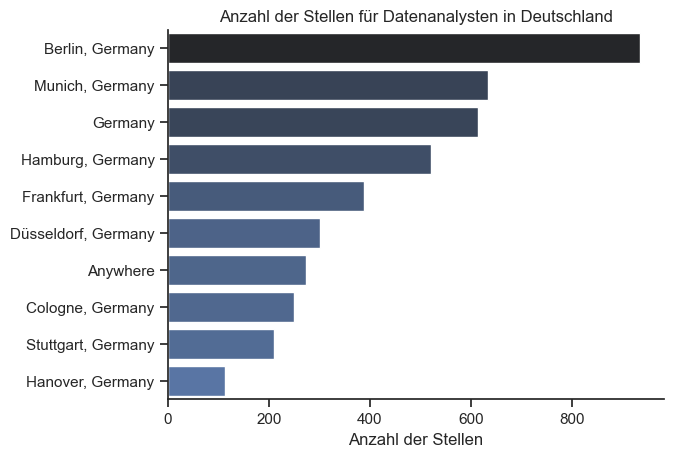

In [8]:
df_plot = df_DA_GER['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Anzahl der Stellen für Datenanalysten in Deutschland')
plt.xlabel('Anzahl der Stellen')
plt.ylabel('')
plt.show()

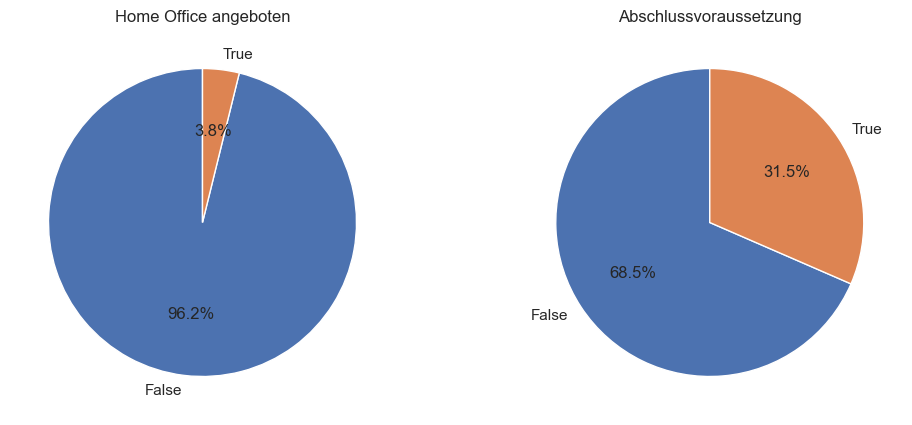

In [11]:
dict_column = {
    'job_work_from_home': 'Home Office angeboten',
    'job_no_degree_mention': 'Abschlussvoraussetzung'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_GER[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

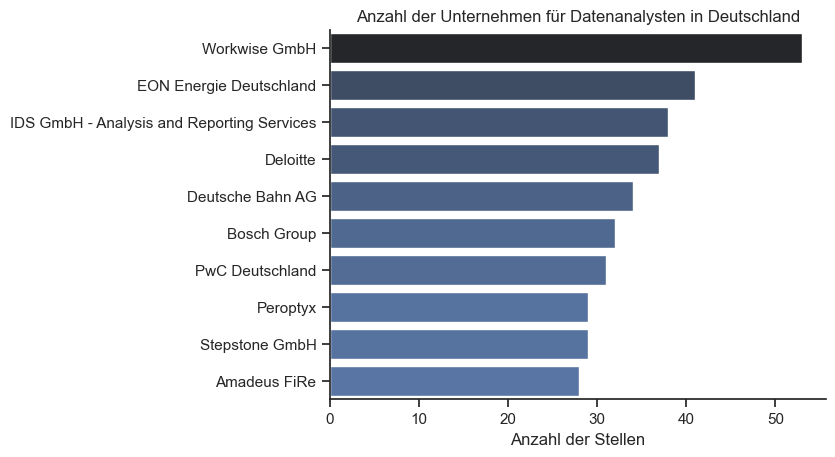

In [14]:
df_plot = df_DA_GER['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Anzahl der Unternehmen für Datenanalysten in Deutschland')
plt.xlabel('Anzahl der Stellen')
plt.ylabel('')
plt.show()